# Galaxies
## Introduction to Astronomy, AGS Winterim 2023
By: Mathilda Avirett-Mackenzie



In [1]:
# packages we will use
import numpy as np                     # needed for some calculations
import matplotlib.pyplot as plt        # does plotting
from astropy.table import Table        # to read in data tables
from astropy.cosmology import Planck18 # to calculate distances

## Galaxy Data
We will use magnitude and position data of galaxies in the [Sloan Digital Sky Survey](https://sdss.org), retrieved with their [SQL search tool](http://skyserver.sdss.org/dr17/SearchTools/sql).

The $u$, $g$, $r$, $i$, and $z$ columns correspond to the different [filters](https://skyserver.sdss.org/dr1/en/proj/advanced/color/sdssfilters.asp) used by the SDSS camera. Filters restrict the image to a certain range of wavelengths (kind of like how our eyes can only see light between about 4000 and 7000 [Angstroms](https://en.wikipedia.org/wiki/Angstrom)). The filters are:

| Filter    | Range         | Peak Wavelength |
| :-:       | :-:           | :-:             |
| $u$       | ultraviolet   | 3543 A          |
| $g$       | green         | 4770 A          |
| $r$       | red           | 6231 A          |
| $i$       | near infrared | 7625 A          |
| $z$       | far infrared  | 9134 A          |

In [2]:
gal_cat = Table.read('../data/sdss-galaxies.csv', format='ascii')

In [3]:
gal_cat

objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,str20,str6,float64,int64,int64,int64
1237646796522195141,110.391575823352,-0.361953341646178,20.08079,18.03626,17.13042,16.80377,16.58634,308,301,2,27,8387985754836719616,GALAXY,0.0,7450,56722,114
1237646796526583841,120.336283577667,-0.283471087021602,18.95077,17.01026,16.15721,15.73908,15.42364,308,301,2,94,5342484767018604544,GALAXY,0.05491782,4745,55892,326
1237646796526715482,120.621250051166,-0.279828638662684,19.74603,17.88813,16.90759,16.38947,15.90818,308,301,2,96,5342473222146512896,GALAXY,0.05209084,4745,55892,284
1237646797058738101,109.628639001544,0.134671978101732,21.29508,18.90263,17.90574,17.55636,17.35069,308,301,3,22,8388122918912284672,GALAXY,0.0,7450,56722,613
1237646797058998885,110.181222514077,0.109706736680112,24.63466,19.08287,17.82297,17.54196,17.98551,308,301,3,26,8388103127702984704,GALAXY,0.0,7450,56722,541
1237646797059457861,111.239760581654,0.0045021847073644,20.32732,17.82122,16.67397,16.25013,16.01603,308,301,3,33,8388015166772762624,GALAXY,0.0,7450,56722,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237672024632133126,328.159064850948,45.1047030377199,19.5021,17.9681,17.33328,17.0733,16.897,6182,301,1,163,2889070503648061440,GALAXY,0.0,2566,54333,41
1237672024632135273,328.192743685951,45.0833324655275,20.59488,19.22935,18.46167,18.14798,17.97466,6182,301,1,163,2889129602398054400,GALAXY,0.0,2566,54333,256


## Color vs magnitude
Like the Hertzsprung-Russell diagram for stars, we can characterize galaxies by plotting color vs brightness. As a reminder, in astronomy we express color as flux ratio or magnitude difference of red light to blue light. A larger color value means a source is redder, while a smaller color value means it is bluer.

In [4]:
color = gal_cat['g'] - gal_cat ['r'] # have to calculate this ourselves this time

We can immediately see that the galaxies are more likely to have colors around 0.5 or 0.9 and less likely to fall in the middle. This is called a bimodal distribution.

In [5]:
# calculate absolute magnitude from distance
# distances to galaxies can get a bit complicated as they are moving away from us
distance = Planck18.luminosity_distance(gal_cat['redshift']).value*1e6
magnitude = gal_cat['r'] - 5*np.log10(distance) + 5   # using the definition of absolute magnitude

/tmp/ipykernel_1384/262914257.py:4: RuntimeWarning: divide by zero encountered in log10
  magnitude = gal_cat['r'] - 5*np.log10(distance) + 5   # using the definition of absolute magnitude


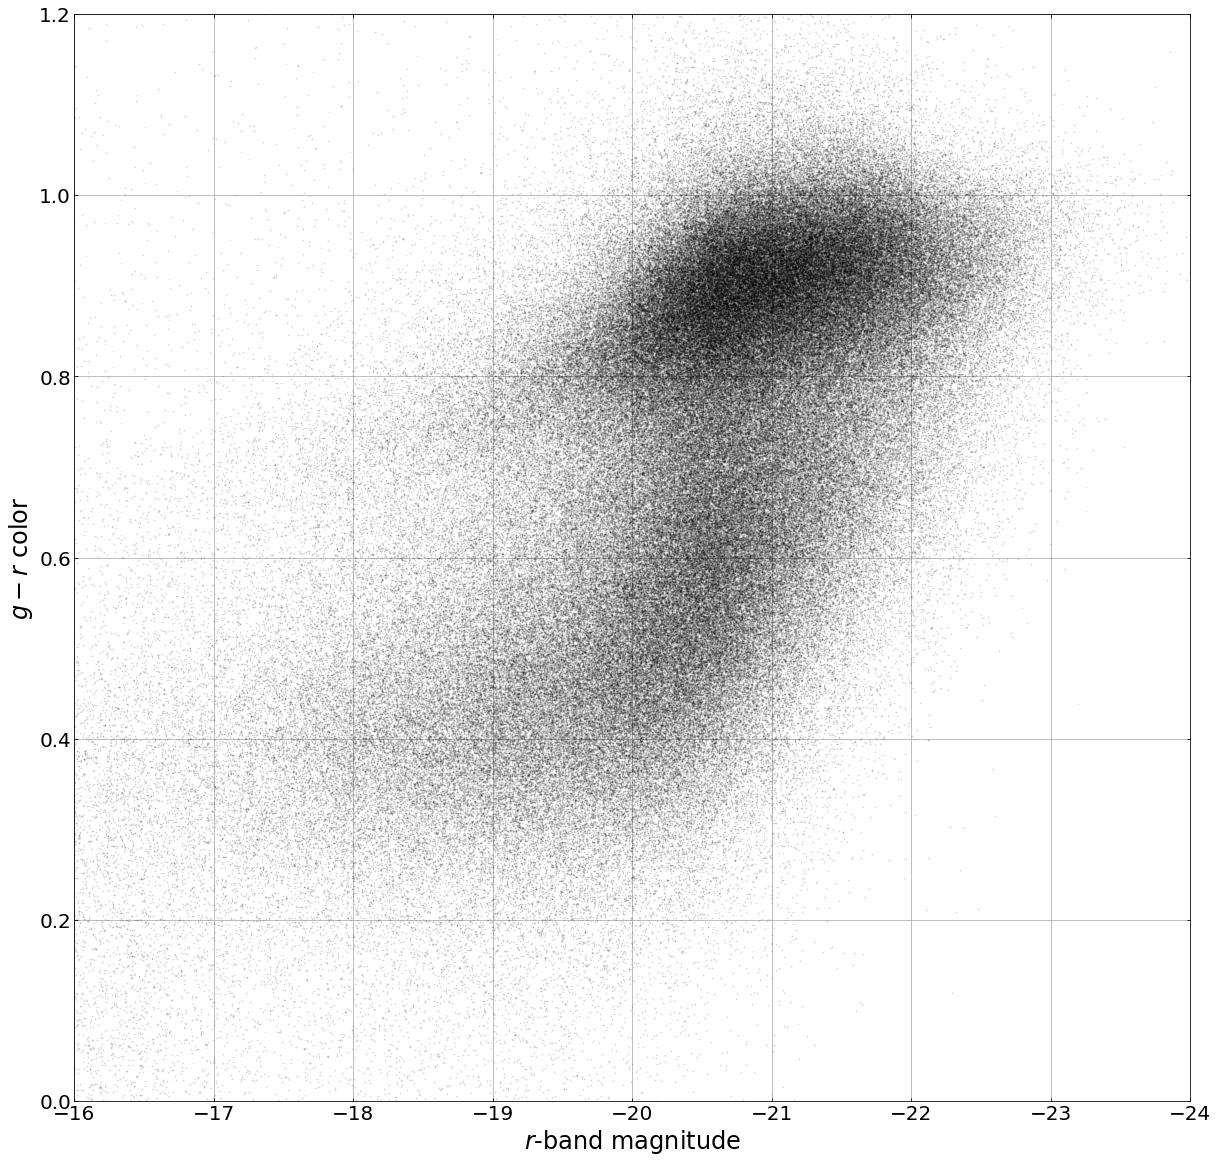

In [9]:
fig = plt.figure(figsize=(20,20))   # create a figure
ax = fig.subplots(nrows=1, ncols=1) # create the plot on the figure

# scatter plot of colors and magnitudes
ax.scatter(magnitude, color, c='k', s=1, zorder=5, alpha=0.1) 

# labelling axes
ax.set_ylabel(r'$g-r$ color', size=24)
ax.set_xlabel(r'$r$-band magnitude', size=24)

# formatting stuff, don't bother reading this bit
# ax.set_yscale('log')
ax.grid('True', zorder=-2) 
ax.set_xlim(-16, -24)
ax.set_ylim(0,1.2)
ax.tick_params(which='minor', left=True, right=True, direction='in')
ax.tick_params(which='major', left=True, right=True, bottom=True, top=True, direction='in', labelsize=20)

There's lots of outliers, but we can see a clear red sequence with $g-r$ between 0.8 and 1, and a somewhat more diffuse blue cloud in the general region of $g-r$ between 0.4 and 0.7.

We can grab the coordinates of some typical galaxies from both regions and look them up in [SkyServer](https://skyserver.sdss.org) to see what they look like. Try looking at both the images and spectra for a few red galaxies and a few blue galaxies.

You may find you'll need to be accurate to up to 3 decimal places in the coordinates to land on the galaxy in SkyServer. Tick the "Objects with spectra" box on the left side under "Drawing Options" to make it draw a red box around all galaxies with spectra.

In [7]:
# red sequence
gal_cat[['ra', 'dec']][np.logical_and(np.logical_and(color > 0.85, color < 0.95),
                                      np.logical_and(magnitude < -20.5, magnitude > -21.5))]

ra,dec
float64,float64
120.336283577667,-0.283471087021602
123.612777090055,0.948787094735607
243.708876085192,-0.915652960805175
243.975757988265,-0.914182432574777
245.700633163194,-0.844300570061714
195.249486352645,-0.726972162954236
...,...
204.855681827016,5.38736873132884
205.837530855964,3.2393136141243


In [8]:
# blue cloud
gal_cat[['ra', 'dec']][np.logical_and(np.logical_and(color > 0.4, color < 0.6),
                                      np.logical_and(magnitude < -20, magnitude > -20.5))]

ra,dec
float64,float64
246.160300368923,-0.896662044102853
195.840337905112,-0.770637116620577
195.978583247281,-0.780048257466325
197.237696982666,-0.744284762737748
197.329428057063,-0.674147756698021
223.344733044781,-0.278414082049685
...,...
204.945600342152,5.12827494310035
206.41233252774,2.0491729630153


## Sky position
Galaxies aren't evenly spaced in the universe; rather, they form a web-like pattern of filaments and nodes surrounding big empty voids. We can see this in action just by plotting the sky positions of galaxies at the same redshift.

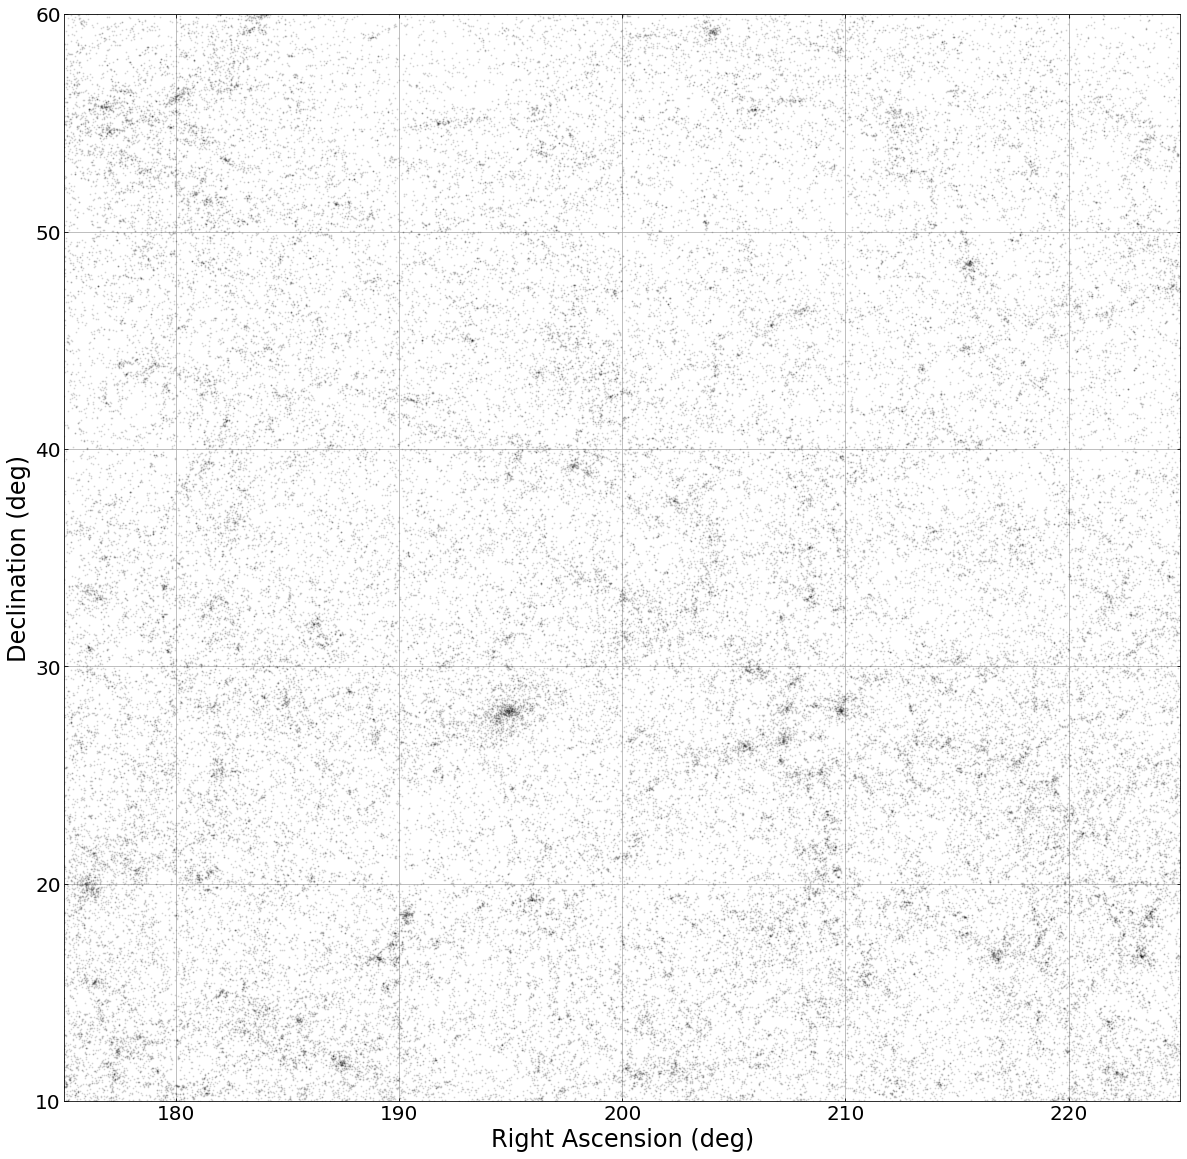

In [13]:
fig = plt.figure(figsize=(20,20))   # create a figure
ax = fig.subplots(nrows=1, ncols=1) # create the plot on the figure

# scatter plot of positions
ax.scatter(gal_cat['ra'], gal_cat['dec'], c='k', s=1, zorder=5, alpha=0.1) 

# labelling axes
ax.set_xlabel('Right Ascension (deg)', size=24)
ax.set_ylabel('Declination (deg)', size=24)

# formatting stuff, don't bother reading this bit
# ax.set_yscale('log')
ax.grid('True', zorder=-2) 
ax.set_xlim(175, 225)
ax.set_ylim(10, 60)
ax.tick_params(which='minor', left=True, right=True, direction='in')
ax.tick_params(which='major', left=True, right=True, bottom=True, top=True, direction='in', labelsize=20)